# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [7]:
import numpy as np
import pandas as pd

## Importing the dataset

In [8]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the K-NN model on the Training set

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Making the Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[284   0  21   0   2   3   9]
 [  0 111   0   0   0   0   0]
 [ 10   0 399   0   5   1   4]
 [  0   0   0 846   1  14  44]
 [  0   0   8   2 470   0  11]
 [  2   0   0   5   0 447  16]
 [  1   0   2  78  13   5 589]]


0.9244784014105202

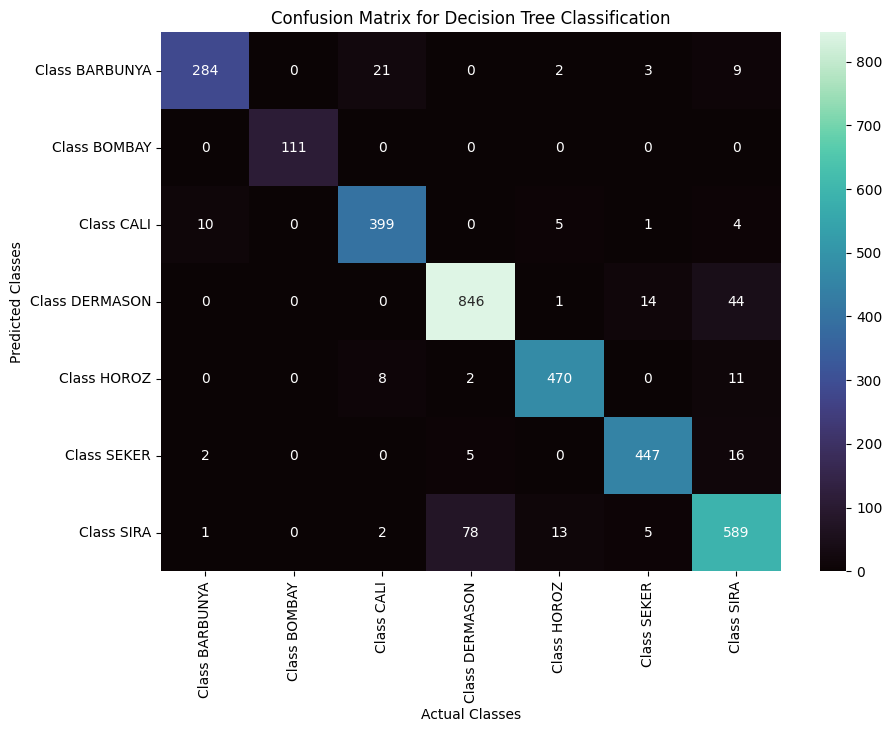

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
cm_matrix = pd.DataFrame(data=cm, 
                         columns=['Class ' + str(cls) for cls in classifier.classes_],
                         index=['Class ' + str(cls) for cls in classifier.classes_])

plt.figure(figsize=(10, 7))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')
plt.title('Confusion Matrix for Decision Tree Classification')
plt.xlabel('Actual Classes')
plt.ylabel('Predicted Classes')
plt.show()